In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
df = pd.read_csv('data/NCI60_X.csv',index_col=0)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,-0.244980,...,-0.590020,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000
V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,-0.084981,...,0.189980,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000
V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,-0.244980,...,-0.210019,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000
V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,-0.114980,...,0.089980,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000
V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,1.145019,...,0.299980,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [378]:
x_raw = df.copy()

In [379]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Standard scaling all columns

In [380]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

creating 4 kmeans clusters

In [381]:
kmc = KMeans(n_clusters=4)
kmc.fit(x_scaled)

KMeans(n_clusters=4)

creating 4 agglomerative clusters

In [382]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(x_scaled)

AgglomerativeClustering(n_clusters=4)

In [383]:
kmc_score = silhouette_score(x_scaled, kmc.labels_, metric = 'euclidean')
agg_score = silhouette_score(x_scaled, agg.labels_, metric = 'euclidean')

In [384]:
from sklearn.decomposition import PCA

Reducing features to 25 principal components

In [385]:
pca = PCA(n_components=25)
x_scaled_pca = pca.fit_transform(x_scaled)

In [386]:
scaled_pca_df = pd.DataFrame(x_scaled_pca)
scaled_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.838084,-3.556092,-9.813686,-0.826899,12.611597,7.464068,14.172911,-3.203805,22.010754,-20.394082,...,-6.235648,20.988965,8.964448,7.357964,4.786644,-8.269700,5.653765,12.130027,13.975607,-4.772482
1,-23.089294,-6.440564,-13.475157,5.622527,8.017987,3.726662,10.095862,-7.313913,22.517092,-13.119232,...,4.852573,19.691927,5.692824,10.220985,16.971233,-1.188715,8.708387,3.877634,12.691234,-5.336917
2,-27.456026,-2.465483,-3.533745,-1.331610,12.578975,17.333632,10.378874,-2.598955,-0.294133,-6.235895,...,-7.793927,12.833228,-0.238144,-3.789701,5.727845,-0.043919,-7.643167,-4.610838,0.500733,-8.568800
3,-42.816655,9.769048,-0.889563,3.455261,42.268982,27.224871,17.577761,-0.617713,14.124339,15.952300,...,-21.133721,-3.172228,0.873548,2.583687,0.272203,3.998624,18.564781,7.348658,-16.770596,2.641211
4,-55.418759,5.197994,-21.097435,15.844167,10.428693,12.994318,12.555310,32.452621,-7.834740,-10.347988,...,-4.173312,-19.666432,-16.176222,-2.936316,1.370408,4.880193,-6.559479,2.963715,-8.246002,-18.913982
5,-27.178256,-6.780025,-21.816322,13.859453,-8.007346,0.691865,28.070822,31.246308,-11.090885,2.481912,...,-16.174040,-4.089863,7.676343,-8.227456,-29.990435,-6.740554,11.201580,-8.462248,8.062470,27.439902
6,-31.445777,-3.865909,-30.356820,41.669250,-10.417789,-16.982230,23.714173,-0.930570,14.197269,-7.850396,...,13.995808,-14.864224,-10.720576,15.074503,10.644566,-7.061113,-4.418464,11.382892,1.615587,4.609898
7,-22.332243,-10.397071,-18.753961,6.941238,5.525216,11.759002,11.725707,22.914580,-3.498030,-5.030285,...,8.297528,15.150573,-4.257047,-3.385656,-9.311499,29.126473,7.650436,-3.924194,-20.798499,-4.993835
8,-14.289680,-16.109391,-19.756034,6.557885,3.816586,-8.009166,-13.132644,7.116798,0.820186,-7.930875,...,-6.223307,1.040248,-7.734850,-0.090309,-4.033316,-7.829315,-19.674189,-1.550527,1.285713,-10.026172
9,-29.748253,-23.991710,-5.885358,-10.018031,-3.444248,11.674551,0.573673,8.060113,-20.134644,-27.710121,...,12.575084,-6.937735,38.329983,-9.781242,13.466883,19.915021,-25.985591,-3.700923,2.848902,15.474334


In [387]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.11358942 0.06756202 0.05751842 0.04247551 0.03734969 0.03618624
 0.03066181 0.02685855 0.02529209 0.02375632 0.02355998 0.0216376
 0.02048624 0.01976475 0.01915168 0.01770285 0.01658616 0.01609054
 0.01590351 0.01547971 0.01493491 0.01473411 0.01429818 0.01349081
 0.01302834]
0.7180994412094373


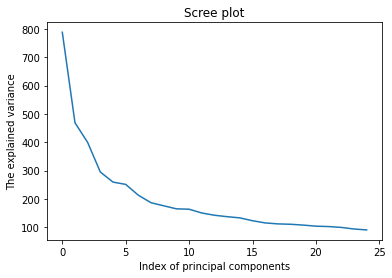

In [388]:
ax = sns.lineplot(pca.explained_variance_)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance")
plt.show()

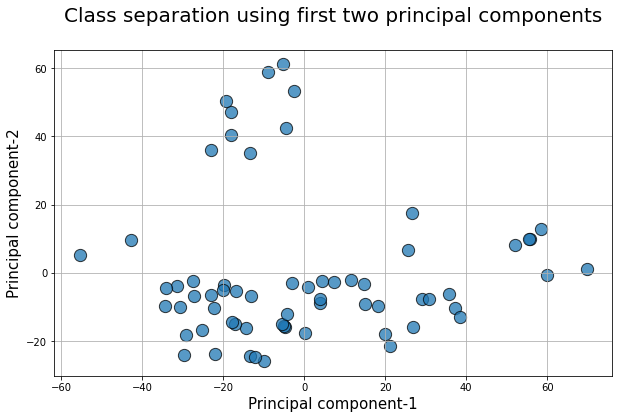

In [389]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled_pca[:,0],x_scaled_pca[:,1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

creating 4 kmeans clusters on pca reduced dataset

In [390]:
kmc_pca = KMeans(n_clusters=4)
kmc_pca.fit(x_scaled_pca)

KMeans(n_clusters=4)

creating 4 agglomerative clusters on pca reduced dataset

In [391]:
agg_pca = AgglomerativeClustering(n_clusters=4)
agg_pca.fit(x_scaled_pca)

AgglomerativeClustering(n_clusters=4)

In [392]:
kmc_score_pca = silhouette_score(x_scaled_pca, kmc_pca.labels_, metric = 'euclidean')
agg_score_pca = silhouette_score(x_scaled_pca, agg_pca.labels_, metric = 'euclidean')

## Comparing results

In [393]:
comparison = (('Raw Data', kmc_score, agg_score),
      ('PCA reduced', kmc_score_pca, agg_score_pca))

In [394]:
comparison_df = pd.DataFrame(comparison, columns = ["Dataset", "KMeans", "Agglomerative"])
comparison_df.set_index('Dataset', inplace=True)
comparison_df

,KMeans,Agglomerative
Dataset,,
Raw Data,0.052010,0.076382
PCA reduced,0.138773,0.124034


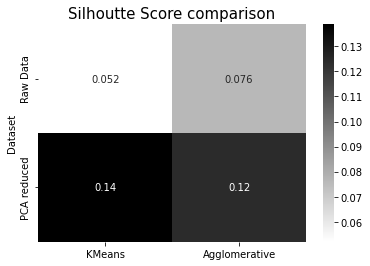

In [395]:
sil_comparison = sns.heatmap(comparison_df,cmap='binary', annot=True)
sil_comparison.set_title("Silhoutte Score comparison",fontsize=15)
plt.show()

Therefore K means clustering on PCA reduced dataset gives the best score

In [396]:
df_cluster = df.copy()

In [397]:
df_cluster['Cluster'] = kmc_pca.labels_
df_cluster

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,Cluster
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,2
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,2
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,2
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,2
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,0
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,0
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,0
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,0


In [398]:
y_kmeans = kmc_pca.fit_predict(x_scaled_pca)

### Plotting Kmeans Cluster on PCA reduced dataset

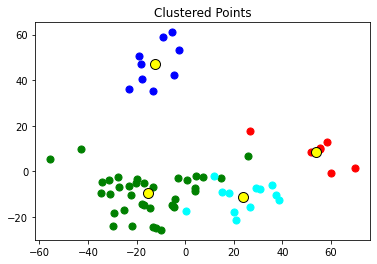

In [399]:
plt.scatter(x_scaled_pca[y_kmeans==0, 0], x_scaled_pca[y_kmeans==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(x_scaled_pca[y_kmeans==1, 0], x_scaled_pca[y_kmeans==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(x_scaled_pca[y_kmeans==2, 0], x_scaled_pca[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(x_scaled_pca[y_kmeans==3, 0], x_scaled_pca[y_kmeans==3, 1], s=50, c='cyan', label ='Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc_pca.cluster_centers_[:, 0], kmc_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids')
plt.title('Clustered Points')
plt.show()